In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
data = pd.read_csv("indian_liver_patient.csv")
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [3]:
data.info()
print("\n data size:",data.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB

 data size: 6413


# Exploratary Data Analysis

In [4]:
df=data
categorical_val = []
continous_val = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

[]

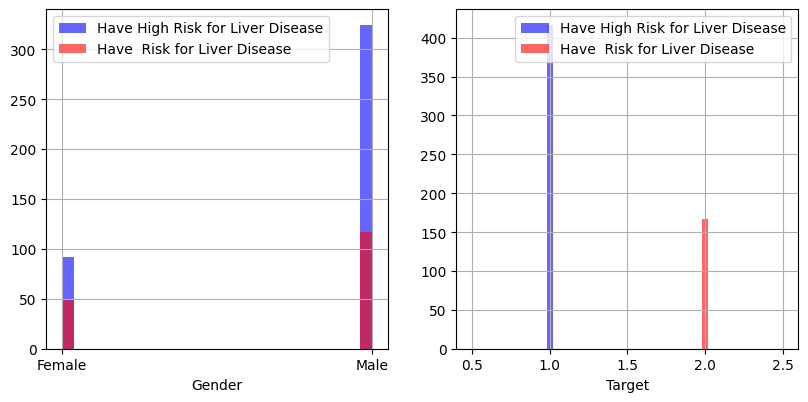

In [5]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["Target"] == 1][column].hist(bins=25, color='blue', label='Have High Risk for Liver Disease', alpha=0.6)
    df[df["Target"] == 2][column].hist(bins=25, color='red', label="Have  Risk for Liver Disease", alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.plot()

[]

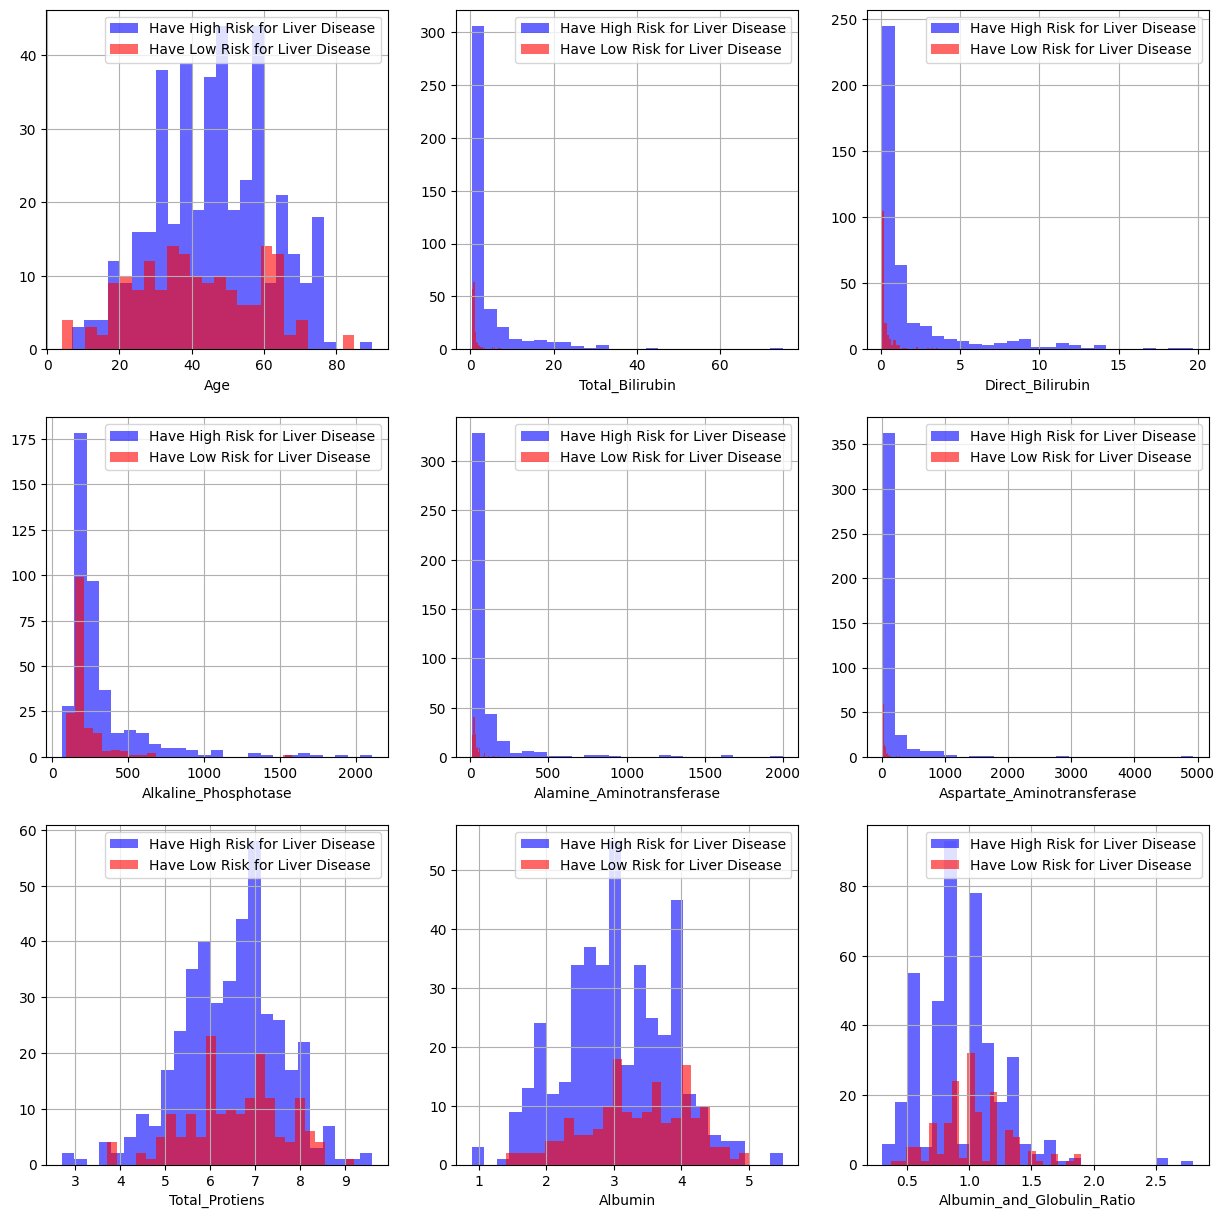

In [6]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df["Target"] == 1][column].hist(bins=25, color='blue', label='Have High Risk for Liver Disease', alpha=0.6)
    df[df["Target"] == 2][column].hist(bins=25, color='red', label="Have Low Risk for Liver Disease", alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.plot()

In [7]:
from sklearn.preprocessing import LabelEncoder
df['Gender']= LabelEncoder().fit_transform(df['Gender'])
print(df.isna().sum())

#filling na value with mean value
df['Albumin_and_Globulin_Ratio'].fillna(value=df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [8]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


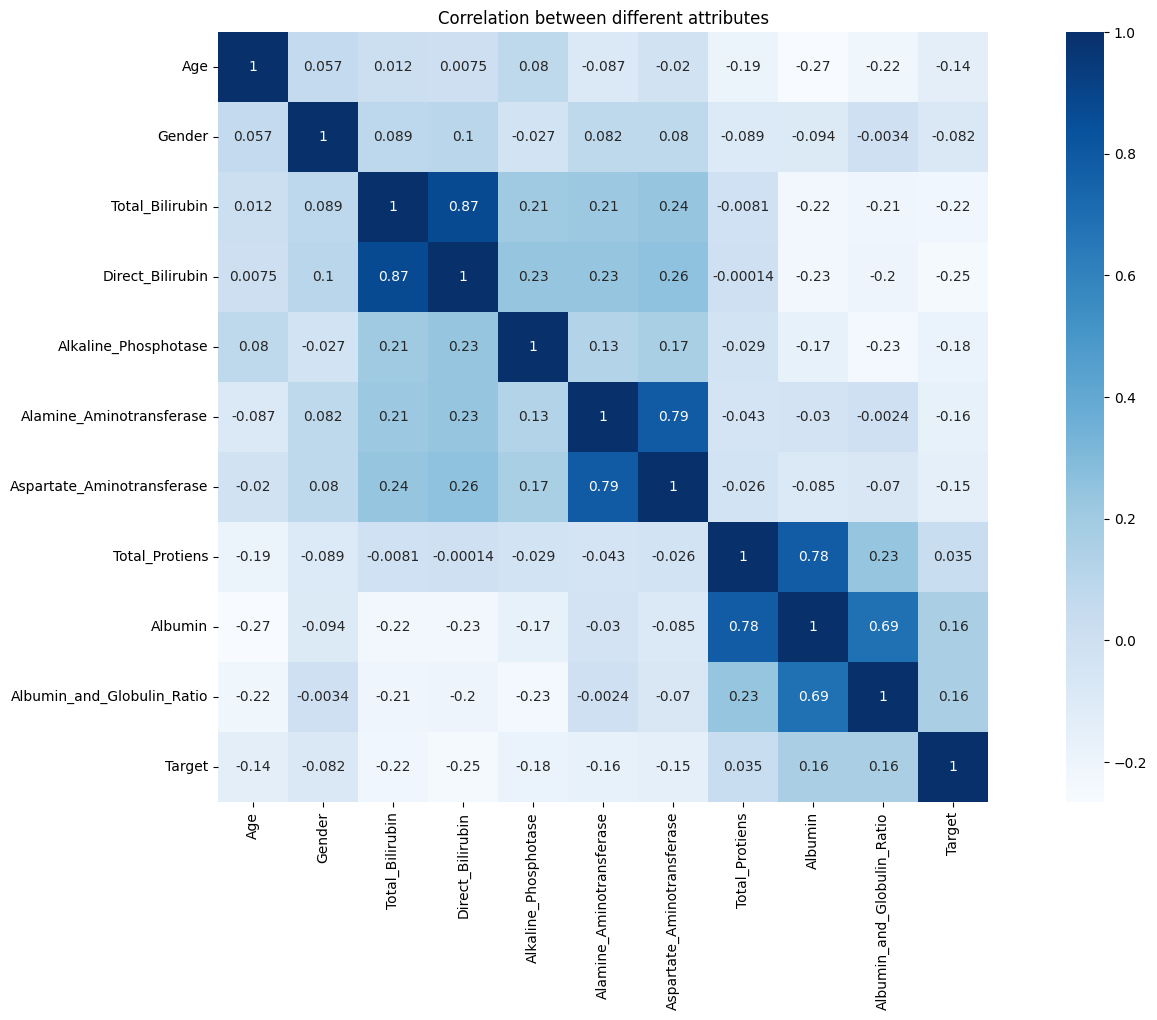

In [9]:
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [10]:
#Correlation with output variable
cor_target = abs(cor["Target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Age                           0.137351
Gender                        0.082416
Total_Bilirubin               0.220208
Direct_Bilirubin              0.246046
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Aspartate_Aminotransferase    0.151934
Total_Protiens                0.035008
Albumin                       0.161388
Albumin_and_Globulin_Ratio    0.162319
Target                        1.000000
Name: Target, dtype: float64

# Training and Testing Datasets over Several Model

In [11]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
Y = df['Target'].values
X = df.drop('Target', axis=1).values
# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(437, 10) (146, 10) (437,) (146,)


In [12]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('LGR', LogisticRegression()))
models.append(('RDC',RandomForestClassifier(n_estimators=10)))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model: Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model: Mean accuracy is 0.645455 (Std accuracy is 0.082376)
For SVM Model: Mean accuracy is 0.711839 (Std accuracy is 0.044854)
For NB Model: Mean accuracy is 0.549313 (Std accuracy is 0.035706)
For KNN Model: Mean accuracy is 0.645032 (Std accuracy is 0.071390)
For LGR Model: Mean accuracy is 0.722886 (Std accuracy is 0.054997)
For RDC Model: Mean accuracy is 0.714112 (Std accuracy is 0.047243)


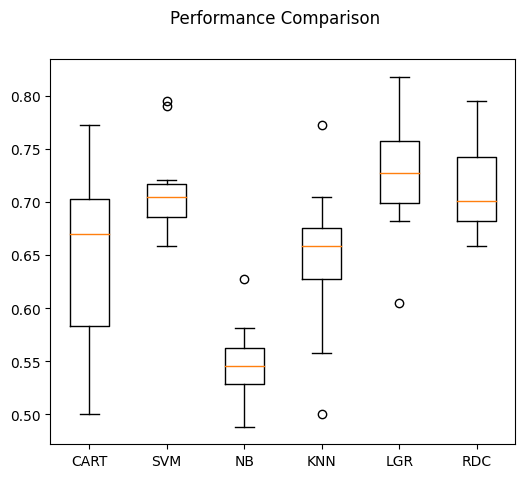

In [13]:
fig = plt.figure(figsize=(6,5))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions)) 


Model: CART
Accuracy score: 0.589041095890411
Classification report:
               precision    recall  f1-score   support

           1       0.74      0.67      0.71       107
           2       0.29      0.36      0.32        39

    accuracy                           0.59       146
   macro avg       0.51      0.52      0.51       146
weighted avg       0.62      0.59      0.60       146


Model: SVM
Accuracy score: 0.7397260273972602
Classification report:
               precision    recall  f1-score   support

           1       0.74      1.00      0.85       107
           2       1.00      0.03      0.05        39

    accuracy                           0.74       146
   macro avg       0.87      0.51      0.45       146
weighted avg       0.81      0.74      0.64       146


Model: NB
Accuracy score: 0.5547945205479452
Classification report:
               precision    recall  f1-score   support

           1       0.98      0.40      0.57       107
           2       0.37  

In [15]:
#Logistic Regression giving a better accuracy so using it for model prediction
clf = LogisticRegression()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.726027397260274


array([1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1], dtype=int64)